# Problem Statement

Clinical studies often require detailed patients’ information documented in clinical narratives. Named Entity Recognition (NER) is a fundamental Natural Language Processing (NLP) task to extract entities of interest (e.g., disease names, medication names and lab tests) from clinical narratives, thus to support clinical and translational research. Clinical notes have been analyzed in greater detail to harness important information for clinical research and other healthcare operations, as they depict rich, detailed medical information.
 
In this challenge, hackers are invited to extract all disease names from a given set of 20000 paragraphs/documents in the test set provided the labelled entities (diseases) for 30000 documents in the train set.
 
For example, here is a sentence from a clinical report:
We compared the inter-day reproducibility of post-occlusive reactive hyperemia (PORH) assessed by single-point laser Doppler flowmetry (LDF) and laser speckle contrast analysis (LSCI).
 
In the sentence given, reactive hyperemia (in bold) is the named entity with the type disease/indication


# Data Description

The train file has the following structure:
 
Variable             Definition

id                   Unique ID for a token/word

Doc_ID               Unique ID for a Document/Paragraph

Sent_ID              Unique ID for a Sentence

Word                 Exact word/token

tag(Target)         Named Entity Tag
 
The target 'tag' follows the Inside-outside-beginning (IOB) tagging format. The IOB format (short for inside, outside, beginning) is a common tagging format for tagging tokens in named-entity recognition.

•	The B-indications (beginning) tag indicates that the token is the beginning of a disease entity (disease name in this case)

•	An I-indications (inside) tag indicates that the token is inside an entity

•	An O (outside) tag indicates that a token is outside a disease entity


In [1]:
import pandas as pd
import numpy as np
####
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
#
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head(15)

,id,Doc_ID,Sent_ID,Word,tag
0,1,1,1,Obesity,O
1,2,1,1,in,O
2,3,1,1,Low-,O
3,4,1,1,and,O
4,5,1,1,Middle-Income,O
5,6,1,1,Countries,O
6,7,1,1,:,O
7,8,1,1,Burden,O
8,9,1,1,",",O
9,10,1,1,Drivers,O


In [4]:
df.tag.value_counts()

O                4446206
B-indications      53003
I-indications      44624
Name: tag, dtype: int64

In [40]:
wordsdf[df['tag'] != 'O']['Word'].unique().tolist()

['strategies',
 'MICROCEPHALIA',
 'VERA',
 'reactive',
 'hyperemia',
 'acute',
 'cholecystitis',
 'Temporal',
 'lobe',
 'epilepsy',
 'cognitive',
 'changes',
 'partial',
 'seizures',
 'syringomyelia',
 'Pulmonary',
 'embolism',
 'Parkinson',
 "'s",
 'disease',
 'human',
 'immunodeficiency',
 'virus',
 '(',
 'HIV',
 ')',
 'infection',
 'posthypnotic',
 'amnesia',
 'capillaries',
 'epilepsies',
 'tumorigenesis',
 'lymphomas',
 'neoplasia',
 'leukemia',
 'mutagenic',
 'effect',
 'congenital',
 'malformations',
 'cadmium',
 'exposure',
 'tumor',
 'growth',
 'sarcomas',
 'brain',
 'injury',
 'recidivism',
 'Coma',
 'episodic',
 'memory',
 'Episodic',
 'action-postural',
 'tremor',
 'PD',
 'bradykinesia',
 'postural',
 'Gonorrhoea',
 'gonorrhoea',
 'sexually',
 'transmitted',
 'infections',
 'hypertension',
 'migraine',
 'Migraine',
 'disorder',
 'quadriplegia',
 'Gastroduodenal',
 'Intussusception',
 'Prostate',
 'cancer',
 'Coronary',
 'Occlusion-Some',
 'neurological',
 'complication',
 '

In [33]:
word =[]
new_Word = []
new_tag = []

doc_list = [ set(df.Doc_ID.values)]
for words in df[df['Doc_ID'] == 5]['Word'].values:
    word.append(words)
sentence = ' '.join(word)

In [34]:
sentence

'The putative chloride channel hCLCA2 has a single C-terminal transmembrane segment . Calcium-activated chloride channel ( CLCA ) proteins were first described as a family of plasma membrane Cl ( - ) channels that could be activated by calcium . Genetic and electrophysiological studies have supported this view . The human CLCA2 protein is expressed as a 943-amino-acid precursor whose N-terminal signal sequence is removed followed by internal cleavage near amino acid position 680 . Earlier investigations of transmembrane geometry suggested five membrane passes . However , analysis by the more recently derived simple modular architecture research tool algorithm predicts that a C-terminal 22-amino-acid hydrophobic segment comprises the only transmembrane pass . To resolve this question , we raised an antibody against hCLCA2 and investigated the synthesis , localization , maturation , and topology of the protein . Cell surface biotinylation and endoglycosidase H analysis revealed a 128-kDa

In [36]:
doc_list

[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [8]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [10]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [48]:
df_new = df[['Word','tag']]

In [51]:
df_new.shape

(4543833, 2)

In [58]:
df_no_dups = df_new.drop_duplicates()

In [59]:
df_no_dups.shape

(191081, 2)

In [90]:
def clean(word):
    word_ = re.sub("\S*\d\S*", "",str(word))
    word_ = re.sub('[^A-Za-z]+', ' ', word_)
    word_ = re.sub("^[-+]?[0-9]|[\d+]|[<|>|?|.|,|/|:=()|-|^=]+$",'',word_)
    word_ = str(word_).replace('-',' ')
    word_ = re.sub("(^[-+]?[\d+]|[\W])","",word_)
    if word_ in stopwords:
        word_ = np.nan
    return word_

In [91]:
df_no_dups['Word_New'] = df_no_dups['Word'].apply(lambda x : clean(x))

In [92]:
df_no_dups.head()

,Word,tag,Word_New
0,Obesity,O,Obesity
2,Low-,O,Low
4,Middle-Income,O,MiddleIncome
5,Countries,O,Countries
6,:,O,


In [93]:
df_no_dups.isnull().sum()

Word          0
tag           0
Word_New    131
dtype: int64

In [94]:
df_no_dups = df_no_dups.dropna()

In [95]:
df_no_dups.shape

(190786, 3)

In [103]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
new_label = label.fit_transform(df_no_dups['tag'].values)

In [104]:
len(new_label)

190786

In [105]:
df_no_dups['tag_new'] = new_label

In [106]:
df_no_dups.tag_new.value_counts()

2    179281
0      7767
1      3738
Name: tag_new, dtype: int64

In [107]:
df_no_dups.tag.value_counts()

O                179281
B-indications      7767
I-indications      3738
Name: tag, dtype: int64

In [109]:
X= df_no_dups['Word_New']
Y = df_no_dups['tag_new']

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=5)
tf_idf_vect.fit(X)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[-25:])
print('='*50)

some sample features(unique words in the corpus) ['visual', 'vitamin', 'vo', 'vocal', 'vocational', 'voice', 'volume', 'vs', 'wall', 'water', 'way', 'weight', 'wet', 'wheat', 'white', 'withdrawal', 'within', 'wo', 'women', 'word', 'work', 'workplace', 'wound', 'zinc', 'zone']


In [131]:
X_tfidf = tf_idf_vect.transform(X)

In [133]:
X_tfidf.shape

(190786, 1324)

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,Y,test_size=0.3,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(133550, 1324) (57236, 1324)
(133550,) (57236,)


In [158]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
y_pred = rf.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.934027535117758

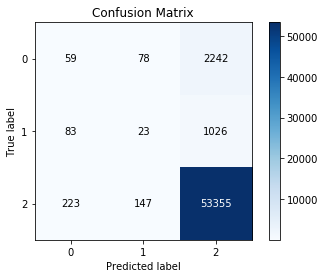

In [140]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

In [141]:
rf.feature_importances_

array([0.00023362, 0.00026268, 0.0010909 , ..., 0.00045256, 0.00052643,
       0.00050725])

#### Test Score

Returns the mean accuracy on the given test data and labels.

In [142]:
rf.score(X_test,y_test)

0.9336256901250961

#### Training Score

In [143]:
rf.score(X_train,y_train)

0.9419468363908649

In [149]:
len(indices)

1324

Text(0.5,0,'Relative Importance')

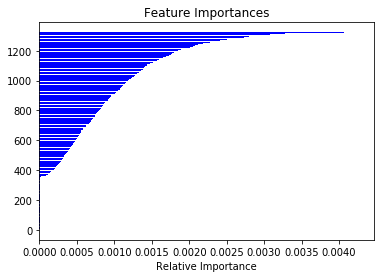

In [151]:
features=tf_idf_vect.get_feature_names()
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(0,len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')